# Aufgabe 27

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as pp

Es sei $X(t),\ t>0$ ein stochastischer Prozess mit der Verteilungsfunktion

In [2]:
def F(x, t):
    """Verteilungsfunktion von X zum Zeitpunkt t"""
    return 1 - np.exp( -(x/t)**2 )

Der Prozess sei weiß. Es folgt:

In [3]:
def f(x, t):
    """Dichte von X zum Zeitpunkt t"""
    return 2 * x / t**2 * np.exp( -(x/t)**2 )

def E_X(t):
    """Erwartungswert von X zum Zeitpunkt t"""
    return np.pi ** 0.5 / 2 * t

## Verteilungsfunktion und Dichte

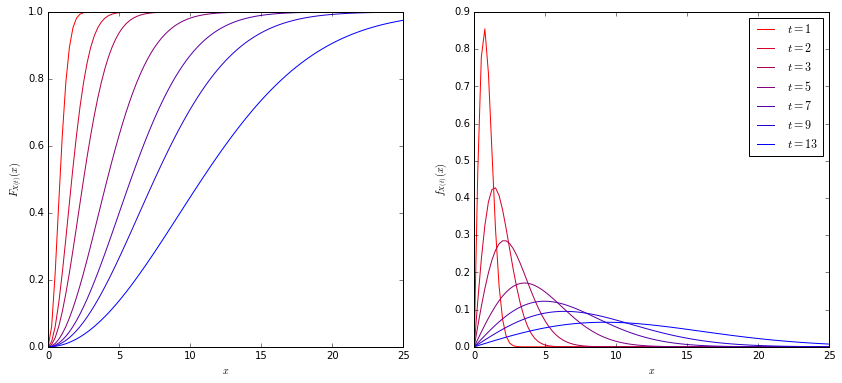

In [4]:
x, times = np.linspace(0, 25, 101), (1, 2, 3, 5, 7, 9, 13)

pp.figure(figsize=(14, 6)); pp.subplot(121)
for i, t in enumerate(times):
    pp.plot(x, F(x, t), color=(1-i/6, 0, i/6))
pp.xlabel(r'$x$'); pp.ylabel(r'$F_{X(t)}(x)$')

pp.subplot(122)
for i, t in enumerate(times):
    pp.plot(x, f(x, t), color=(1-i/6, 0, i/6), label=r'$t={}$'.format(t))
pp.xlabel(r'$x$'); pp.ylabel(r'$f_{X(t)}(x)$'); pp.legend();

## Zeitpunkt fest: Zufallsvariable $X(5)$

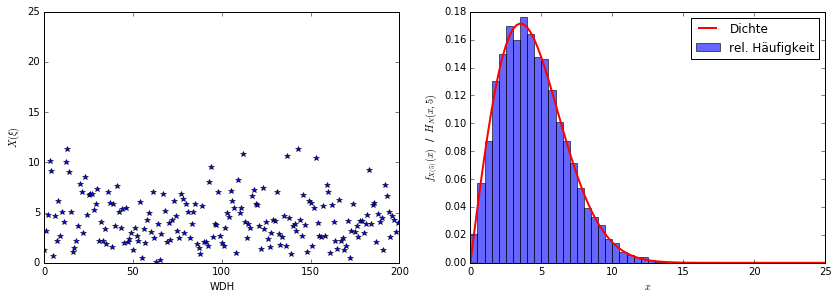

In [5]:
def F_inv(p, t):
    """Inverse Verteilungsfunktion von X zum Zeitpunk t"""
    return t * np.sqrt( -np.log(1 - p) )

x5_samples = F_inv(np.random.sample(10000), t=5)  # Samples von X(5) aus Gleichverteilung

pp.figure(figsize=(14, 4.5)); pp.subplot(121)
pp.plot(x5_samples[:200], '*')
pp.xlabel('WDH'); pp.ylabel(r'$X(\xi)$'); pp.ylim(0, 25)

pp.subplot(122)
pp.hist(x5_samples, bins=50, normed=True, range=(0, 25), alpha=0.6, label='rel. Häufigkeit')
pp.plot(x, f(x, t=5), color='r', linewidth=2, label='Dichte')
pp.xlabel(r'$x$'); pp.ylabel(r'$f_{X(5)}(x)$  /  $H_N(x, 5)$'); pp.legend();

## Ergebnis fest: Realisierung $x(t)$

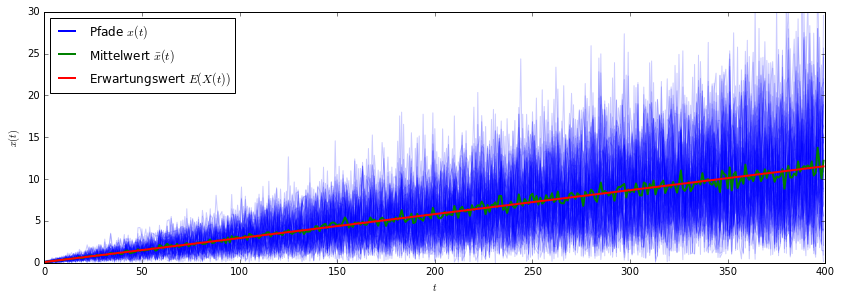

In [6]:
def random_path(t):
    """Zufälliger Pfad von X"""
    return F_inv(np.random.sample(t.shape), t)

t_samples = np.linspace(0.1, 13, 400)  # Zeitsamples für die zuf. Pfade
paths = np.vstack(random_path(t_samples) for _ in range(50))  # zufällige Pfade in Matrix

pp.figure(figsize=(14, 4.5))
pp.plot( paths.T,            color='b', alpha=0.2); 
pp.plot( 0,                  color='b', linewidth=2, label=r'Pfade $x(t)$') 
pp.plot( paths.mean(axis=0), color='g', linewidth=2, label=r'Mittelwert $\bar{x}(t)$')
pp.plot( E_X(t_samples),     color='r', linewidth=2, label=r'Erwartungswert $E(X(t))$')  
pp.xlabel(r'$t$'); pp.ylabel(r'$x(t)$'); pp.ylim(0, 30);
pp.legend(*(l[-3:] for l in pp.gca().get_legend_handles_labels()), loc=0);